In [2]:
regions = [[-0.744,-0.742,-0.052,-0.05, "Seahorse Valley"],
            [-1.5,-1,-0.5,0, "Main Bulb"],
            [0.25,0.75,-0.75-0.25, "Elephant Valley"],
            [-0.775, -0.755, 0.125, 0.145, "The Needle"],
            [-0.745, -0.725, .105, 0.125, "Triple Spiral"],
            [-0.1015, -0.1010, 0.6330, 0.6335, "Deep Zoom (Small Bulb)"],
            [-0.82, -0.78, 0.18, 0.22, "Spiral Arms"]]

for i in regions:
    for xmin, xmax, ymin, ymax, name in regions[i]: 
        print("f{xmin}<x<f{xmox}, f{ymin}<y<f{ymax} = f{name}")

TypeError: list indices must be integers or slices, not list

In [3]:
regions = [[-0.744, -0.742, -0.052, -0.05, "Seahorse Valley"],
           [-1.5, -1, -0.5, 0, "Main Bulb"],
           [0.25, 0.75, -0.75, -0.25, "Elephant Valley"],
           [-0.775, -0.755, 0.125, 0.145, "The Needle"],
           [-0.745, -0.725, 0.105, 0.125, "Triple Spiral"],
           [-0.1015, -0.1010, 0.6330, 0.6335, "Deep Zoom (Small Bulb)"],
           [-0.82, -0.78, 0.18, 0.22, "Spiral Arms"]]

# Iterate through the regions and unpack values
for xmin, xmax, ymin, ymax, name in regions:
    print(f"{xmin}<x<{xmax}, {ymin}<y<{ymax} = {name}")


-0.744<x<-0.742, -0.052<y<-0.05 = Seahorse Valley
-1.5<x<-1, -0.5<y<0 = Main Bulb
0.25<x<0.75, -0.75<y<-0.25 = Elephant Valley
-0.775<x<-0.755, 0.125<y<0.145 = The Needle
-0.745<x<-0.725, 0.105<y<0.125 = Triple Spiral
-0.1015<x<-0.101, 0.633<y<0.6335 = Deep Zoom (Small Bulb)
-0.82<x<-0.78, 0.18<y<0.22 = Spiral Arms


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
 
# Function to compute the Mandelbrot set
def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

In [6]:
# Generate the Mandelbrot set for a grid of complex numbers
def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    mandelbrot_image = np.zeros((height, width))
   
    total_points = width * height
    progress_interval = total_points // 100  # Update progress every 1%
    progress_counter = 0
 
    for i in range(width):
        for j in range(height):
            c = r1[i] + r2[j] * 1j
            mandelbrot_image[j, i] = mandelbrot(c, max_iter)
 
            # Count the number of points processed
            progress_counter += 1
 
            # Print progress every 1%
            if progress_counter % progress_interval == 0:
                progress_percentage = (progress_counter / total_points) * 100
                clear_output(wait=True)
                print(f"\rProgress: {progress_percentage:.2f}%", end="", flush=True)

    return mandelbrot_image            

Progress: 100.00%

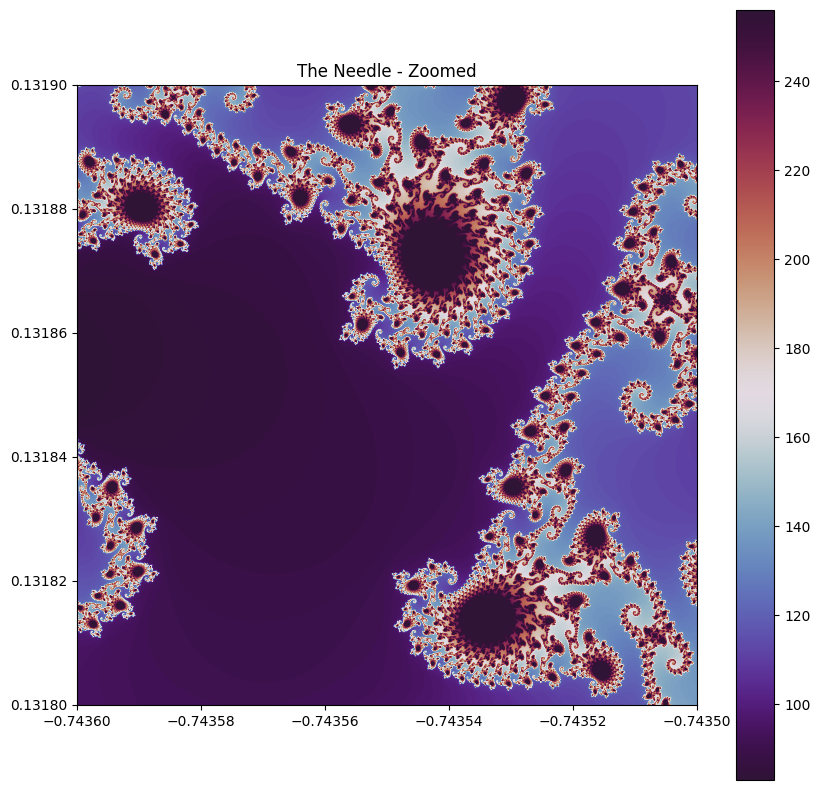

In [8]:
width = 2000
height = 2000
max_iter = 256

# Parameters for the Needle region
xmin, xmax = -0.7436, -0.7435  # Tighter zoom around the Needle
ymin, ymax = 0.1318, 0.1319

# Generate and display the Mandelbrot set for the Needle
mandelbrot_image = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)

# Display the plot
fig, ax = plt.subplots(figsize=(10, 10))  # Keep a square figure
cax = ax.imshow(mandelbrot_image, cmap='twilight_shifted', extent=[xmin, xmax, ymin, ymax], origin='lower')
fig.colorbar(cax)

# Set the title
ax.set_title("The Needle - Zoomed")

# Show the plot
plt.show()